# **Model For the titanic dataset**
## Objective of this model
- Identify the key factors that influenced passenger survival during the Titanic disaster.
- Build a predictive model capable of estimating a passenger’s likelihood of survival based on their attributes.
### Different steps:
  **1.** Understand the goal.

  **2.** Load the data and inspect its structure.

  **3.** Analyze distributions, correlations, and patterns.

  **4.** Handle missing values and convert categorical variables into numerical formats if needed.

  **5.** Normalize or scale numerical features if needed.

  **6.** Separate the dataset into training and testing sets

  **7.** Save the trained model (e.g., with joblib)

### **Here is the link of the competition on this dataset ->** - [kaggle](https://www.kaggle.com/competitions/titanic)
>this subject is a classic project when starting machine learning

---
# ***Loading the dataset and import differents libraries***

In [1]:
import numpy as np
import pandas as pd
import pathlib

try:
    df_path = pathlib.Path('/app/data/train.csv')
    df = pd.read_csv(df_path)
except Exception as e:
    print(f'Error:\n{e}')

---
# ***Useful data Informations of the dataset***

In [2]:
df #different features of the dataset and some examples

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info() # some summarize info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe().T #some useful metrics of the dataset

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### **differents features**
- Survival: if they are dead or not -> 0 or
- Pclass: the ticket class -> 1st, 2nd or 3rd
- Name: Name of the passengers -> string
- Sex: Sex of the passengers -> male or female
- Age: Age of the passengers -> Intergers
- SibSp: number of siblings / spouses aboard the Titanic: integers
- Parch: number of parents / children aboard the Titanic: integers
- Ticket: the id of the passenger ticket: number
- Fare: Price of the passenger ticket: float
- Cabin: number of the passenger cabin: number
- Embarked: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

---
# ***Analyze features and correlation***

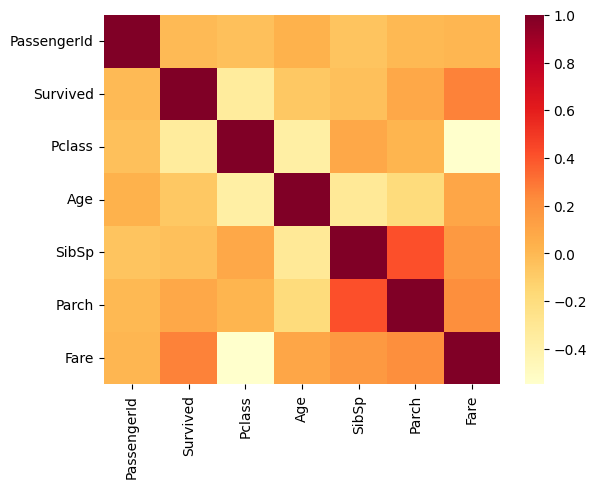

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='YlOrRd')
plt.show()

---
# ***Preparing the data for the training phase***

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId']) #remove useless features that dont impact the result
X = pd.get_dummies(X, drop_first=True) # transform non numerical feature to it without duplicate it (drop_first=True)
y = df['Survived'] # feature to predict

bool_cols = X.select_dtypes(include='bool').columns # changing the columns where there is boolean values to int and only containt numerical values
X[bool_cols] = X[bool_cols].astype(int)

X['Age'] = X['Age'].fillna(X['Age'].median()) # fill nan or empty values in the age feature with the median to have same count for all features

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X = scaler.fit_transform(X_train) # normalize the datas
y = y_train.to_numpy() #convert the array to a numy array

---
# ***Training Phase***

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #use to test the model during the trraining (without the test values) and optimizing hyperparameters if needed
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()), #optionnal
    ("model", RandomForestClassifier()) 
])

param_grid = { #different hypereparameters
    "model__n_estimators": [10, 100, 200, 500],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 3, 4]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring="accuracy",
    return_train_score=True
)

grid_search.fit(X, y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__max_depth': [None, 5, ...], 'model__min_samples_split': [2, 3, ...], 'model__n_estimators': [10, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and paramete

### ***WAIT THE TRAINING PHASE BEFORE CONTINUE***

In [10]:
model = grid_search.best_estimator_ #best hyperparameters

---
# ***Test Phase with the test values splitted before from the same dataset***

In [11]:
X_predict = scaler.transform(X_test)
y_predict = y_test.to_numpy()

In [12]:
model.score(X_predict, y_predict)

0.8212290502793296

In [13]:
y_fin = model.predict(X_predict)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_fin)

0.8212290502793296

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_predict, y_fin)

array([[100,  10],
       [ 22,  47]])

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_predict, y_fin))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



---
# ***Save the model in a file***

In [18]:
from joblib import dump

models_dir = pathlib.Path('..') / 'models'
models_dir.mkdir(parents=True, exist_ok=True)
model_path = models_dir / 'model.joblib'
dump(model, model_path)

print(f"Model saved to {model_path.resolve()}")

Model saved to /app/models/model.joblib
